# Revolutionize your Airbnb Business in Cape Town with a Cutting-Edge Recommender System

#### Group 2 - Collaborators
> * Mercy Onduso
> * Nurulain Abdi
> * Amos Kibet
> * Beth Mithamo

# Overview

Airbnb is a global online marketplace that offers housing and other accommodations to travelers. The platform has grown significantly in popularity over the years, with millions of hosts and guests using the platform for their travel needs.


The aim of this project is to create a recommender system that will help stakeholders and clients have a better strategy in decision making. The system will also help stakeholders do proper renovations of their listings efficiently without inconveniencing their clients.


# Business Problem 

Airbnb has become a popular alternative to traditional hotels for tourists and visitors in Cape Town, South Africa. However, despite its many advantages, users often face several challenges when using the platform. These include poor recommendations, unreliable pricing, and subpar customer experience. Moreover, stakeholders often struggle to renovate their listings to meet the needs of their target customers.
A South-Africa based housing company wants to venture into the Airbnb business and needs to create a sustainable and profitable business model that can compete with established players in the market. The company's stakeholders aims at ensuring customer retention,customer satisfaction and boost their business as a new party entity in the Airbnb Platform.  As Data Scientists, we are expected to address questions as well as provide recommendations.

Some of the questions we are expected to answer are:
1. What is the best month to visit Cape Town if you are on a budget?
2. What is the best time to list your property on Airbnb? And how do set price rates according to the time of the year?
3. What is the best time in the year when owners can take down their listing for maintenance and repair?
4. When is the best time to lure clients with offers in the case of an upcoming low season: Time series analysis


# Data

We extracted the data from InsideAirbnb which has data from the Airbnb platform. The link to the dataset is provided here: "http://insideairbnb.com/get-the-data/"

The data from the Airbnb app provides insights into the availability, pricing, and characteristics of short-term rental properties, such as apartments, houses, and rooms. The data can be used to understand the demand and supply dynamics in the market, as well as the preferences of guests and hosts. The data can also help identify trends and patterns in guest behavior, such as popular locations, amenities, and property types. Additionally, the data will be used in the development of a recommender systems that can make personalized recommendations to guests based on their preferences and past behavior. This will help both stakeholders and their clients have better strategies during decision making.


# Airbnb Exploration

*  Who needs the Recommender System? The Host- A South Africa-based Housing Company 
*  Which technologies does the Airbnb platform use in providing recommendations as of now? Cookies, Mobile Identifiers, Tracking URLs, log data.
* Airbnb uses two machine learning models in predicting prices for clients: Smart Pricing and Price Tips. 



# Possible Algorithms 

1. Collaborative Filtering: This algorithm is based on the idea that people who have similar preferences in the past are likely to have similar preferences in the future. Collaborative filtering can be further divided into two types: user-based and item-based. In user-based collaborative filtering, recommendations are made based on the preferences of similar users. In item-based collaborative filtering, recommendations are made based on the similarity between items.

2. Content-Based Filtering: This algorithm is based on the idea that recommendations can be made based on the characteristics of the items being recommended. For example, if a user has shown a preference for properties with a specific location or amenities, a content-based filtering algorithm can recommend similar properties based on these characteristics.

3. Matrix Factorization: This algorithm is based on the idea that the preferences of users and items can be represented in a lower-dimensional space. Matrix factorization algorithms try to find latent factors that explain the observed preferences of users and items, and use these factors to make recommendations.

4. Hybrid Algorithms: Hybrid algorithms combine two or more recommendation techniques to make more accurate and diverse recommendations. For example, a hybrid algorithm could combine collaborative filtering and content-based filtering to provide a more personalized and diverse set of recommendations.



# Data Understanding and cleaning

The data contains distinct features that will help in the anaysis and prediction. These are:
1. 'id' : The unique identifier for the clients
2. 'name' : The name of the hotel/apartment
3. 'host_id' :  The unique identifier for the various hosts
4. 'host_name' : The name of the host
5. 'neighbourhood_group': The area where the apartment/hotel is geographically located
6.  'neighbourhood' : Name of the neighbourhood
7.  'latitude' and  'longitude' : The exact geographical location
8.  'room_type' : The type of room, whether it was a single private room or an entire apartment
9.  'price' : The price 
10. 'minimum_nights' : Minimum night spent by clients
11. 'number_of_reviews': Number of reviews from the clients
12. 'last_review': When the last review was
13. 'reviews_per_month'
14. 'calculated_host_listings_count',
15. 'availability_365', 
16. 'number_of_reviews_ltm',
17. 'license'


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
#import listing dataset 
url = "https://raw.githubusercontent.com/MercyMoraa/InsideAirbnb/main/listing%20final3.csv"
listing_df = pd.read_csv(url,encoding='ISO-8859-1' )

print("Dataset shape:",listing_df.shape)
listing_df.head()

Dataset shape: (9481, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1625734,https://www.airbnb.com/rooms/1625734,2.022120e+13,12/29/2022,city scrape,"Fabulous Villa, Large Entertainment Area Patio...",You will love this fabulous Villa! Expansive l...,Located next to the Constantia Wine Lands home...,https://a0.muscache.com/pictures/ca9e8f0f-d55a...,8643899,...,5.00,5.00,5.00,NaN,f,4,3,1,0,0.10
1,1626659,https://www.airbnb.com/rooms/1626659,2.022120e+13,12/29/2022,city scrape,Big Bay La Paloma - 2 bedroom suite,Enjoy the beautiful Bloubergstrand ~ Cape Town...,Big Bay Homestay is situated in the the tranqu...,https://a0.muscache.com/pictures/31710939/c96e...,5646468,...,5.00,4.83,4.92,NaN,f,2,0,2,0,0.11
2,736534,https://www.airbnb.com/rooms/736534,2.022120e+13,12/29/2022,city scrape,Enjoy a Private Room in Chartfield Guesthouse,Awaken in a stylish private room to fresh coff...,"A gem on the False Bay coastline, Kalk Bay is ...",https://a0.muscache.com/pictures/monet/Select-...,3007248,...,4.75,5.00,4.83,NaN,t,18,13,5,0,0.82
3,742345,https://www.airbnb.com/rooms/742345,2.022120e+13,12/30/2022,city scrape,Room with a View - Green Point,Fully furnished studio apartment with a fully ...,NaN,https://a0.muscache.com/pictures/10201360/7ea2...,3886732,...,4.00,4.33,3.83,NaN,t,80,79,1,0,0.29
4,3191,https://www.airbnb.com/rooms/3191,2.022120e+13,12/29/2022,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,...,4.96,4.75,4.79,NaN,t,1,1,0,0,0.60


In [3]:
#Investigate listing dataset
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9481 non-null   int64  
 1   listing_url                                   9481 non-null   object 
 2   scrape_id                                     9481 non-null   float64
 3   last_scraped                                  9481 non-null   object 
 4   source                                        9481 non-null   object 
 5   name                                          9481 non-null   object 
 6   description                                   9363 non-null   object 
 7   neighborhood_overview                         7139 non-null   object 
 8   picture_url                                   9481 non-null   object 
 9   host_id                                       9481 non-null   i

In [4]:
#Check for null values in the listing dataset
null_count = listing_df.isna().sum()

# select columns with null values greater than zero
null_cols = null_count.loc[null_count > 0]

# display the null values by column
print(null_cols)

description                      118
neighborhood_overview           2342
host_location                   1224
host_about                      3737
host_response_time              1671
host_response_rate              1671
host_acceptance_rate            1286
host_is_superhost                 19
host_neighbourhood              9453
neighbourhood                   2342
neighbourhood_group_cleansed    9481
bathrooms                       9481
bathrooms_text                    32
bedrooms                         576
beds                              57
minimum_minimum_nights             2
maximum_minimum_nights             2
minimum_maximum_nights             2
maximum_maximum_nights             2
minimum_nights_avg_ntm             2
maximum_nights_avg_ntm             2
calendar_updated                9481
first_review                    1396
last_review                     1396
review_scores_rating            1396
review_scores_accuracy          1514
review_scores_cleanliness       1513
r

In [5]:
#drop columns with more than 50% null values
na_cols = listing_df[['host_neighbourhood','neighbourhood_group_cleansed','bathrooms','calendar_updated','license']]
na_cols

,host_neighbourhood,neighbourhood_group_cleansed,bathrooms,calendar_updated,license
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9476,NaN,NaN,NaN,NaN,NaN
9477,NaN,NaN,NaN,NaN,NaN
9478,NaN,NaN,NaN,NaN,NaN
9479,NaN,NaN,NaN,NaN,NaN


In [6]:
listing_df = listing_df.drop(na_cols, axis=1)
listing_df.shape

(9481, 70)

In [7]:
#Investigate and drop irrelevant columns
cols_drop = listing_df[['listing_url',
                        'scrape_id',
                        'last_scraped',
                        'source',
                        'host_thumbnail_url',
                        'host_picture_url',
                        'picture_url', 
                        'latitude',
                        'longitude',
                        'calendar_last_scraped']]


listing_df = listing_df.drop(cols_drop, axis=1)
listing_df.shape

(9481, 60)

In [8]:
#Check for dupliactes
listing_df.duplicated().any()

False

In [9]:
#dropping null values on the bedroom column
listing_df.dropna(subset=['bedrooms'], inplace=True)

In [10]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 0 to 9480
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8905 non-null   int64  
 1   name                                          8905 non-null   object 
 2   description                                   8795 non-null   object 
 3   neighborhood_overview                         6737 non-null   object 
 4   host_id                                       8905 non-null   int64  
 5   host_url                                      8905 non-null   object 
 6   host_name                                     8905 non-null   object 
 7   host_since                                    8905 non-null   object 
 8   host_location                                 7749 non-null   object 
 9   host_about                                    5363 non-null   o

In [11]:
#Impute descriptive columns with a placeholder "Missing" 
Impute_missing= ['description',
             'neighborhood_overview',
             'host_location',
             'host_about',
             'neighbourhood',
             'first_review',
             'last_review',]

listing_df[Impute_missing] = listing_df[Impute_missing].fillna(value = "Missing")
listing_df[Impute_missing].isna().sum()

description              0
neighborhood_overview    0
host_location            0
host_about               0
neighbourhood            0
first_review             0
last_review              0
dtype: int64

In [12]:
#Impute with mean for some numerical columns
Impute_mean = ['beds','minimum_minimum_nights',
               'maximum_minimum_nights',
               'minimum_maximum_nights',
               'maximum_maximum_nights',
               'minimum_nights_avg_ntm',
               'maximum_nights_avg_ntm',
               'review_scores_rating',
               'review_scores_accuracy',
               'review_scores_cleanliness',
               'review_scores_checkin',
               'review_scores_communication',
               'review_scores_location',
               'review_scores_value',
               'reviews_per_month']

#find the means of the above columns
mean = listing_df[Impute_mean].mean()

listing_df[Impute_mean] = listing_df[Impute_mean].fillna(value = mean)
listing_df[Impute_mean].isna().sum()

beds                           0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_maximum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

In [13]:
#Impute with mode for some categorical columns
Impute_mode = ['host_response_time',
                'host_response_rate',
                'host_acceptance_rate',
                'host_is_superhost',
                'bathrooms_text',]

#find the mode of the above columns
mode = listing_df[Impute_mode].mode()

listing_df[Impute_mode] = listing_df[Impute_mode].fillna(value = mode.iloc[0])
listing_df[Impute_mode].isna().sum()

host_response_time      0
host_response_rate      0
host_acceptance_rate    0
host_is_superhost       0
bathrooms_text          0
dtype: int64

In [14]:
#Check for null values in the cleaned listing dataset
null_count = listing_df.isna().sum()

# select columns with null values greater than zero
null_cols = null_count.loc[null_count > 0]

# display the null values by column
print(null_cols)

Series([], dtype: int64)


In [15]:
#confrim removal of all null values
listing_df.isna().any()

id                                              False
name                                            False
description                                     False
neighborhood_overview                           False
host_id                                         False
host_url                                        False
host_name                                       False
host_since                                      False
host_location                                   False
host_about                                      False
host_response_time                              False
host_response_rate                              False
host_acceptance_rate                            False
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_verifications                              False
host_has_profile_pic                            False
host_identity_verified      

In [16]:
#import review dataset 
url = "https://raw.githubusercontent.com/MercyMoraa/InsideAirbnb/main/review%20final1.csv"
review_df = pd.read_csv(url, encoding='ISO-8859-1')

print("Dataset shape:",review_df.shape)
review_df.head()

Dataset shape: (13649, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3191,4888238.0,5/31/2013,5737473,Kathleen,Great home away from home! Bridgette and Marth...
1,3191,9128602.0,12/9/2013,8170322,Anita,Das Cottage liegt ruhig und sicher. Wir haben...
2,3191,9924130.0,1/20/2014,4039279,Zacki,This cottage was a great base from which to ex...
3,3191,16659537.0,7/31/2014,9729939,Doug,I had a great stay. All my needs were well ex...
4,3191,23247470.0,11/26/2014,9681619,Christopher,Excellent host. She provided everything we cou...


In [17]:
#Investigate review dataset
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     13649 non-null  int64  
 1   id             13649 non-null  float64
 2   date           13649 non-null  object 
 3   reviewer_id    13649 non-null  int64  
 4   reviewer_name  13649 non-null  object 
 5   comments       13649 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 639.9+ KB


In [18]:
#import calendar dataset 
url = "https://raw.githubusercontent.com/MercyMoraa/InsideAirbnb/main/calendar%20final.csv"
cal_df = pd.read_csv(url)

print("Dataset shape:",cal_df.shape)
cal_df.head()

Dataset shape: (13649, 14)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,736534,12/29/2022,f,"$1,250.00","$1,250.00",1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,736534,12/30/2022,f,"$1,250.00","$1,250.00",2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,736534,12/31/2022,f,"$1,250.00","$1,250.00",2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,736534,1/1/2023,f,"$1,250.00","$1,250.00",1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,736534,1/2/2023,f,"$1,250.00","$1,250.00",1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Investigate calendar dataset
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      13649 non-null  int64  
 1   date            13649 non-null  object 
 2   available       13649 non-null  object 
 3   price           13649 non-null  object 
 4   adjusted_price  13649 non-null  object 
 5   minimum_nights  13649 non-null  int64  
 6   maximum_nights  13649 non-null  int64  
 7   Unnamed: 7      0 non-null      float64
 8   Unnamed: 8      0 non-null      float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     0 non-null      float64
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.5+ MB


In [20]:
#Check for null values on the calendar dataset
cal_df.isna().sum()

listing_id            0
date                  0
available             0
price                 0
adjusted_price        0
minimum_nights        0
maximum_nights        0
Unnamed: 7        13649
Unnamed: 8        13649
Unnamed: 9        13649
Unnamed: 10       13649
Unnamed: 11       13649
Unnamed: 12       13649
Unnamed: 13       13649
dtype: int64

In [21]:
#drop irrelevant columns
cal_df = cal_df.dropna(axis=1)
print(cal_df.isna().sum())
cal_df.head()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,736534,12/29/2022,f,"$1,250.00","$1,250.00",1,1125
1,736534,12/30/2022,f,"$1,250.00","$1,250.00",2,1125
2,736534,12/31/2022,f,"$1,250.00","$1,250.00",2,1125
3,736534,1/1/2023,f,"$1,250.00","$1,250.00",1,1125
4,736534,1/2/2023,f,"$1,250.00","$1,250.00",1,1125


In [22]:
#check for duplicates
cal_df.duplicated().any()

False

In [23]:
# Remove the dollar sign and comma from the 'price' column
cal_df['price'] = cal_df['price'].str.replace('$', '')
cal_df['price'] = cal_df['price'].str.replace(',', '')

# Remove dollar sign and comma from adjusted_price
cal_df['adjusted_price'] = cal_df['adjusted_price'].str.replace('$', '')
cal_df['adjusted_price'] = cal_df['adjusted_price'].str.replace(',', '')

# Converting the two columns to float type
cal_df['price'] = cal_df['price'].astype(float)
cal_df['adjusted_price'] = cal_df['adjusted_price'].astype(float)

# Now the two columns should have no dollar sign and be in float format
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,736534,12/29/2022,f,1250.0,1250.0,1,1125
1,736534,12/30/2022,f,1250.0,1250.0,2,1125
2,736534,12/31/2022,f,1250.0,1250.0,2,1125
3,736534,1/1/2023,f,1250.0,1250.0,1,1125
4,736534,1/2/2023,f,1250.0,1250.0,1,1125


In [24]:
#checking if there is a difference between price and adjusted price
# Creating a new column to store the difference between the two columns
cal_df['ColumnDiff'] = cal_df['price'] - cal_df['adjusted_price']

# Check if there is any difference between the two columns
if (cal_df['ColumnDiff'] == 0).all():
    print('The two columns are the same.')
else:
    print('The two columns are different.')


The two columns are different.


> As expected, the "price" and "adjusted_price" columns can differ when there are seasonal variations in the price of the listings.

## Exploratory Data Analysis

Now that we are done with cleaning lets gain some insights, identify patterns, trends, and anomalies in the data.

#### 1. Best month to visit Cape Town on a budget:

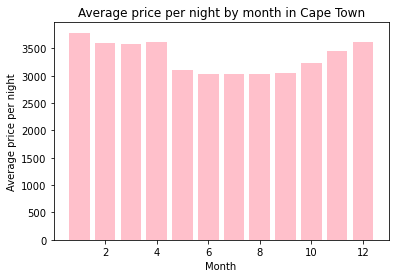

In [25]:
# Convert the date column to a datetime format
cal_df['date'] = pd.to_datetime(cal_df['date'], infer_datetime_format=True)

# Group the data by month and calculate the average price per night
avg_price_by_month = cal_df.groupby(cal_df['date'].dt.month)['price'].mean()

# Visualize the average price per night by month
fig, ax = plt.subplots()
ax.bar(avg_price_by_month.index,avg_price_by_month.values, color='pink')
ax.set_xlabel('Month')
ax.set_ylabel('Average price per night')
ax.set_title('Average price per night by month in Cape Town')
plt.show()

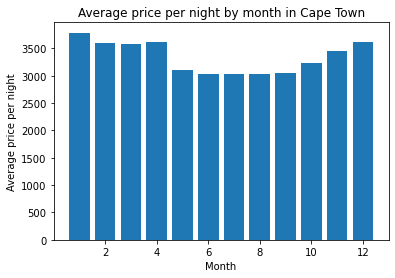

In [26]:
# Group the data by month and calculate the average Adjusted price per night
avg_adj_price_by_month = cal_df.groupby(cal_df['date'].dt.month)['adjusted_price'].mean()

# Visualization of the average adjusted price per night by month
fig, ax = plt.subplots()
ax.bar(avg_adj_price_by_month.index, avg_adj_price_by_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Average price per night')
ax.set_title('Average price per night by month in Cape Town')
plt.show()

###### Results
* Based on the bar graphs, it appears that Cape Town's low season is between the months of June and september and this  may be the best time visit if you are on a budget. These months have the lowest average prices per night for Airbnb listings in Cape Town.

#### Comparison of Adjusted_price and Price 

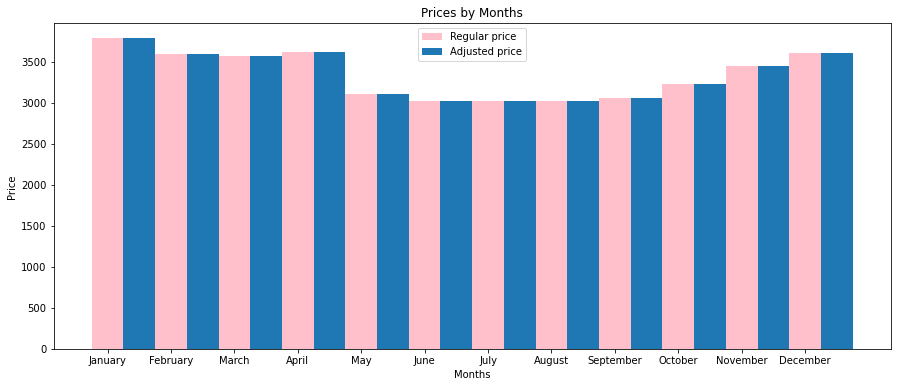

In [27]:
#Visual Comparison of Adjusted_price and Price 

months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Set the width of the bars
bar_width = 0.5

# Create a new figure
fig, ax = plt.subplots(figsize=(15, 6))

# Add the data to the double bar chart, label='
ax.bar(months, avg_price_by_month, width=bar_width, color='pink', label='Regular price')
ax.bar([x + bar_width for x in range(len(months))], avg_adj_price_by_month, width=bar_width, label='Adjusted price')

# Set the title and axis labels
ax.set_title('Prices by Months')
ax.set_xlabel('Months')
ax.set_ylabel('Price')

# Add a legend
ax.legend()

# Display the chart
plt.show()


###### Results
* Based on the visualization, there appears to be little variation between the regular price and adjusted price, The adjusted price is slightly higher during high seasons and slightly low during low seasons compared to the regular price for each month, but the difference is not significant.

#### Comparing the average price per night in high season with the low season 

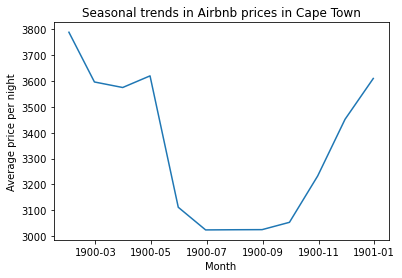

In [28]:
# Resample the data to a monthly frequency
avg_price_by_month.index = pd.to_datetime(avg_price_by_month.index, format='%m')
average_price_by_month = avg_price_by_month.resample('M').mean()
# Plot the time series of average price per night
fig, ax = plt.subplots()
ax.plot(average_price_by_month.index, average_price_by_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Average price per night')
ax.set_title('Seasonal trends in Airbnb prices in Cape Town')
plt.show()

In [29]:
# Filtering the calendar data to include only December, January, June and July
high_season = cal_df[(cal_df['date'].dt.month == 12) | (cal_df['date'].dt.month == 1)]
low_season = cal_df[(cal_df['date'].dt.month == 6) | (cal_df['date'].dt.month == 7)]

# Calculate the average price per night for each season
avg_price_high_season = high_season['price'].mean()
avg_price_low_season = low_season['price'].mean()
avg_price_high_season1 = high_season['adjusted_price'].mean()
avg_price_low_season1= low_season['adjusted_price'].mean()
# Print the results
print('Average price per night in high season: $', round(avg_price_high_season, 2))
print('Average price per night in low season: $', round(avg_price_low_season, 2))
print('Average Adjusted price per night in high season: $', round(avg_price_high_season1, 2))
print('Average Adjusted price per night in low season: $', round(avg_price_low_season1, 2))

Average price per night in high season: $ 3700.39
Average price per night in low season: $ 3024.68
Average Adjusted price per night in high season: $ 3699.26
Average Adjusted price per night in low season: $ 3024.68


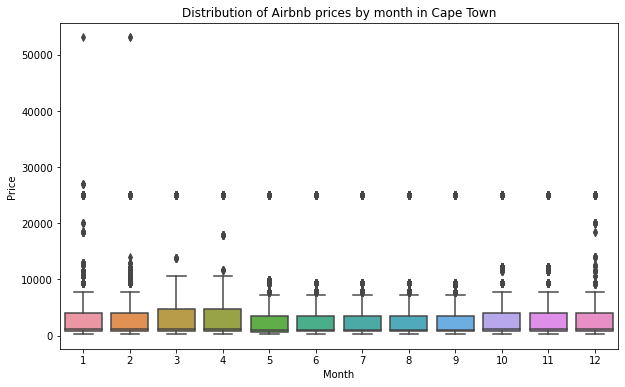

In [30]:
# Creating a boxplot of prices by month
plt.figure(figsize=(10,6))
sns.boxplot(x=cal_df['date'].dt.month, y=cal_df['price'])
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Distribution of Airbnb prices by month in Cape Town')
plt.show()

##### Results


### 2. Best time to list your property on Airbnb and set price rates:

In [31]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   listing_id      13649 non-null  int64         
 1   date            13649 non-null  datetime64[ns]
 2   available       13649 non-null  object        
 3   price           13649 non-null  float64       
 4   adjusted_price  13649 non-null  float64       
 5   minimum_nights  13649 non-null  int64         
 6   maximum_nights  13649 non-null  int64         
 7   ColumnDiff      13649 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 853.2+ KB


In [32]:
cal_df['available'].value_counts()

t    8177
f    5472
Name: available, dtype: int64

In [33]:
#converting 'available' column to numeric
cal_df['available'] = cal_df['available'].map({'t': 1, 'f': 0})

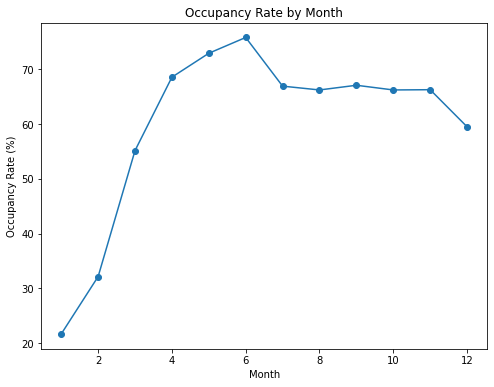

In [34]:
# Extract month from the date column
cal_df['month'] = cal_df['date'].dt.month
# Group the data by month and calculate the occupancy rate
occupancy_rate = cal_df.groupby('month')['available'].mean() * 100

# Plot a time series of the occupancy rate
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(occupancy_rate.index, occupancy_rate.values, '-o')
ax.set_xlabel('Month')
ax.set_ylabel('Occupancy Rate (%)')
ax.set_title('Occupancy Rate by Month')
plt.show()

#### Results
* The occupancy rate for the property varies throughout the year, with the highest occupancy rates during the summer months from June to August. The occupancy rate is lowest during the winter months from December to February. The property has an average occupancy rate of around 65-70% during the peak season and around 20-30% during the off-season. Based on these results, it may be beneficial to list the property during the summer months when the occupancy rate is high and set higher prices during this time.

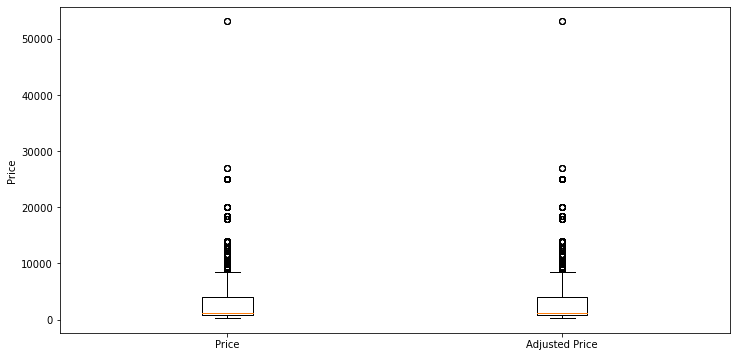

In [35]:
#the distribution of prices for each month 
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12,6))

# Create a boxplot for the price column
ax.boxplot(cal_df['price'], positions=[1])

# Create a boxplot for the adjusted price column
ax.boxplot(cal_df['adjusted_price'], positions=[2])

# Set the x-axis tick labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Price', 'Adjusted Price'])

# Set the y-axis label
ax.set_ylabel('Price')

# Show the plot
plt.show()
